# 1 -  Introduction to ML using Text Classication

Here’s a high-level overview of the workflow used to solve machine learning problems:

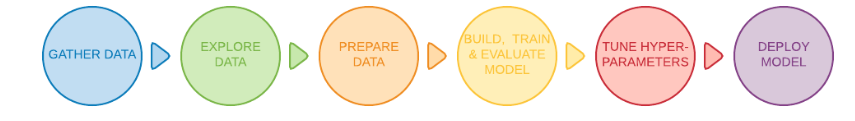

In [22]:
import os
import _pickle as cPickle

from collections             import Counter

#from sklearn.metrics         import accuracy_score
#from sklearn.naive_bayes     import MultinomialNB
#from sklearn.model_selection import train_test_split as tts

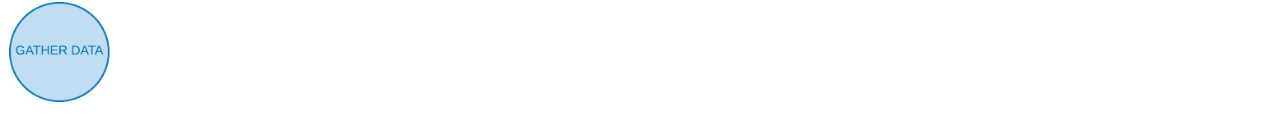

In [2]:
direc = "dataset/"
files = os.listdir(direc)
texts = [direc + file for file in files]

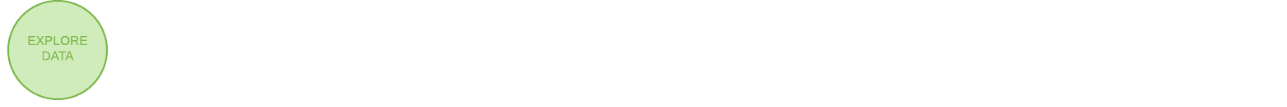

In [23]:
texts

['dataset/0001.1999-12-10.farmer.ham.txt',
 'dataset/0002.1999-12-13.farmer.ham.txt',
 'dataset/0003.1999-12-14.farmer.ham.txt',
 'dataset/0004.1999-12-14.farmer.ham.txt',
 'dataset/0005.1999-12-14.farmer.ham.txt',
 'dataset/0006.2003-12-18.GP.spam.txt',
 'dataset/0007.1999-12-14.farmer.ham.txt',
 'dataset/0008.2003-12-18.GP.spam.txt',
 'dataset/0009.1999-12-14.farmer.ham.txt',
 'dataset/0010.1999-12-14.farmer.ham.txt',
 'dataset/0011.1999-12-14.farmer.ham.txt',
 'dataset/0012.1999-12-14.farmer.ham.txt',
 'dataset/0013.1999-12-14.farmer.ham.txt',
 'dataset/0014.1999-12-15.farmer.ham.txt',
 'dataset/0015.1999-12-15.farmer.ham.txt',
 'dataset/0016.1999-12-15.farmer.ham.txt',
 'dataset/0017.2003-12-18.GP.spam.txt',
 'dataset/0018.2003-12-18.GP.spam.txt',
 'dataset/0019.1999-12-15.farmer.ham.txt',
 'dataset/0020.1999-12-15.farmer.ham.txt',
 'dataset/0021.1999-12-15.farmer.ham.txt',
 'dataset/0022.1999-12-16.farmer.ham.txt',
 'dataset/0023.1999-12-16.farmer.ham.txt',
 'dataset/0024.1999-12-

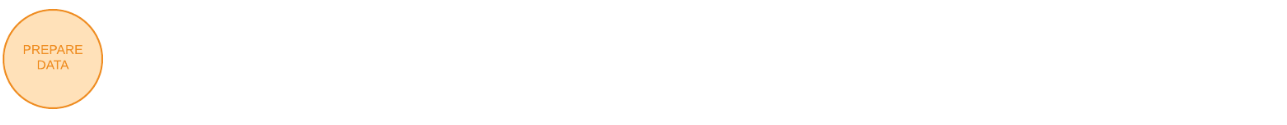

## Preprocessing and Vectorization
1. How do we present the text data to an algorithm that expects numeric input?
2. What type of model should we use?
3. What configuration parameters should we use for our model?

In [13]:
ngrams   = []
progress = len(texts)

for file in texts:
    
    f = open(file)
    
    try:
        data = f.read()
    except: pass
    
    ngrams += data.split(" ")
    
    print(progress)
    progress -= 1

5173
5172
5171
5170
5169
5168
5167
5166
5165
5164
5163
5162
5161
5160
5159
5158
5157
5156
5155
5154
5153
5152
5151
5150
5149
5148
5147
5146
5145
5144
5143
5142
5141
5140
5139
5138
5137
5136
5135
5134
5133
5132
5131
5130
5129
5128
5127
5126
5125
5124
5123
5122
5121
5120
5119
5118
5117
5116
5115
5114
5113
5112
5111
5110
5109
5108
5107
5106
5105
5104
5103
5102
5101
5100
5099
5098
5097
5096
5095
5094
5093
5092
5091
5090
5089
5088
5087
5086
5085
5084
5083
5082
5081
5080
5079
5078
5077
5076
5075
5074
5073
5072
5071
5070
5069
5068
5067
5066
5065
5064
5063
5062
5061
5060
5059
5058
5057
5056
5055
5054
5053
5052
5051
5050
5049
5048
5047
5046
5045
5044
5043
5042
5041
5040
5039
5038
5037
5036
5035
5034
5033
5032
5031
5030
5029
5028
5027
5026
5025
5024
5023
5022
5021
5020
5019
5018
5017
5016
5015
5014
5013
5012
5011
5010
5009
5008
5007
5006
5005
5004
5003
5002
5001
5000
4999
4998
4997
4996
4995
4994
4993
4992
4991
4990
4989
4988
4987
4986
4985
4984
4983
4982
4981
4980
4979
4978
4977
4976
4975
4974


3534
3533
3532
3531
3530
3529
3528
3527
3526
3525
3524
3523
3522
3521
3520
3519
3518
3517
3516
3515
3514
3513
3512
3511
3510
3509
3508
3507
3506
3505
3504
3503
3502
3501
3500
3499
3498
3497
3496
3495
3494
3493
3492
3491
3490
3489
3488
3487
3486
3485
3484
3483
3482
3481
3480
3479
3478
3477
3476
3475
3474
3473
3472
3471
3470
3469
3468
3467
3466
3465
3464
3463
3462
3461
3460
3459
3458
3457
3456
3455
3454
3453
3452
3451
3450
3449
3448
3447
3446
3445
3444
3443
3442
3441
3440
3439
3438
3437
3436
3435
3434
3433
3432
3431
3430
3429
3428
3427
3426
3425
3424
3423
3422
3421
3420
3419
3418
3417
3416
3415
3414
3413
3412
3411
3410
3409
3408
3407
3406
3405
3404
3403
3402
3401
3400
3399
3398
3397
3396
3395
3394
3393
3392
3391
3390
3389
3388
3387
3386
3385
3384
3383
3382
3381
3380
3379
3378
3377
3376
3375
3374
3373
3372
3371
3370
3369
3368
3367
3366
3365
3364
3363
3362
3361
3360
3359
3358
3357
3356
3355
3354
3353
3352
3351
3350
3349
3348
3347
3346
3345
3344
3343
3342
3341
3340
3339
3338
3337
3336
3335


1890
1889
1888
1887
1886
1885
1884
1883
1882
1881
1880
1879
1878
1877
1876
1875
1874
1873
1872
1871
1870
1869
1868
1867
1866
1865
1864
1863
1862
1861
1860
1859
1858
1857
1856
1855
1854
1853
1852
1851
1850
1849
1848
1847
1846
1845
1844
1843
1842
1841
1840
1839
1838
1837
1836
1835
1834
1833
1832
1831
1830
1829
1828
1827
1826
1825
1824
1823
1822
1821
1820
1819
1818
1817
1816
1815
1814
1813
1812
1811
1810
1809
1808
1807
1806
1805
1804
1803
1802
1801
1800
1799
1798
1797
1796
1795
1794
1793
1792
1791
1790
1789
1788
1787
1786
1785
1784
1783
1782
1781
1780
1779
1778
1777
1776
1775
1774
1773
1772
1771
1770
1769
1768
1767
1766
1765
1764
1763
1762
1761
1760
1759
1758
1757
1756
1755
1754
1753
1752
1751
1750
1749
1748
1747
1746
1745
1744
1743
1742
1741
1740
1739
1738
1737
1736
1735
1734
1733
1732
1731
1730
1729
1728
1727
1726
1725
1724
1723
1722
1721
1720
1719
1718
1717
1716
1715
1714
1713
1712
1711
1710
1709
1708
1707
1706
1705
1704
1703
1702
1701
1700
1699
1698
1697
1696
1695
1694
1693
1692
1691


41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [ ]:
'''
vector = Counter(ngrams)
vector.most_common(3000)
'''

In [21]:
# Delete non alphabetic records
for word in range(len(ngrams)):
    if not ngrams[word].isalpha():
        ngrams[word] = ""

In [24]:
vector = Counter(ngrams)
del vector[""]

vector.most_common(3000)

[('the', 21967),
 ('to', 16094),
 ('ect', 11643),
 ('and', 11323),
 ('for', 9434),
 ('of', 9361),
 ('a', 8809),
 ('you', 7284),
 ('hou', 7283),
 ('in', 6870),
 ('on', 6721),
 ('is', 6660),
 ('this', 5886),
 ('enron', 5285),
 ('i', 4731),
 ('be', 4615),
 ('that', 4263),
 ('will', 3777),
 ('have', 3746),
 ('with', 3569),
 ('your', 3492),
 ('at', 3369),
 ('we', 3350),
 ('s', 3221),
 ('are', 3045),
 ('it', 2941),
 ('by', 2849),
 ('com', 2803),
 ('as', 2792),
 ('from', 2780),
 ('gas', 2757),
 ('or', 2719),
 ('not', 2651),
 ('me', 2413),
 ('deal', 2381),
 ('if', 2357),
 ('meter', 2179),
 ('hpl', 2117),
 ('please', 1957),
 ('re', 1956),
 ('e', 1777),
 ('our', 1764),
 ('any', 1760),
 ('corp', 1753),
 ('can', 1717),
 ('d', 1699),
 ('all', 1593),
 ('has', 1562),
 ('was', 1531),
 ('know', 1466),
 ('an', 1356),
 ('need', 1355),
 ('forwarded', 1292),
 ('new', 1287),
 ('t', 1286),
 ('may', 1271),
 ('up', 1253),
 ('j', 1239),
 ('mmbtu', 1193),
 ('should', 1157),
 ('do', 1155),
 ('am', 1102),
 ('get',

In [ ]:
def make_vector():
    
    direc = "dataset/"
    files = os.listdir(direc)
    texts = [direc + file for file in files]

    ngrams   = []
    progress = len(texts)

    for file in texts:

        f = open(file)

        try:
            data = f.read()
        except: pass

        ngrams += data.split(" ")

        print(progress)
        progress -= 1
    
    for word in range(len(ngrams)):
        if not ngrams[word].isalpha():
            ngrams[word] = ""
        
    vector = Counter(ngrams)
    del vector[""]

    return vector.most_common(3000)

# ML algorithms take numbers as inputs. Then, we need to convert the texts into numerical vectors. 

### Doing it by

    1.Tokenization: Divide texts into words or smaller sub-texts.
        a. text is represented as a collection of unique n-grams (n = 1). Example: ['the', 'mouse', 'ran', 'up', 'clock'],
        b. text is represented as a collection of bigrams (n = 2). Example: ['the mouse', 'mouse ran', 'ran up', 'up the', 'the clock'], and so on.
    
    2. Vectorization: Numerical measure to characterize texts.
        a. After the Tokenization (split your data into n-grams). Turn n-grams into numerical vectors. Example: {'the': 7, 'mouse': 2, 'ran': 4, 'up': 10}

In [ ]:
def make_dict():
    
    # Geeting text inputs
    direc = "emails/"
    files = os.listdir(direc)
    emails = [direc + email for email in files]
    words = []
    c = len(emails)

    # Tokenization: Divide texts into words or smaller sub-texts.
    for email in emails:
        f = open(email)
        blob = f.read()
        words += blob.split(" ")
        print (c)
        c -= 1

    # Vectorization: Numerical measure to characterize texts.
    for i in range(len(words)):
        if not words[i].isalpha():
            words[i] = ""

    dictionary = Counter(words)
    del dictionary[""]
    return dictionary.most_common(3000)

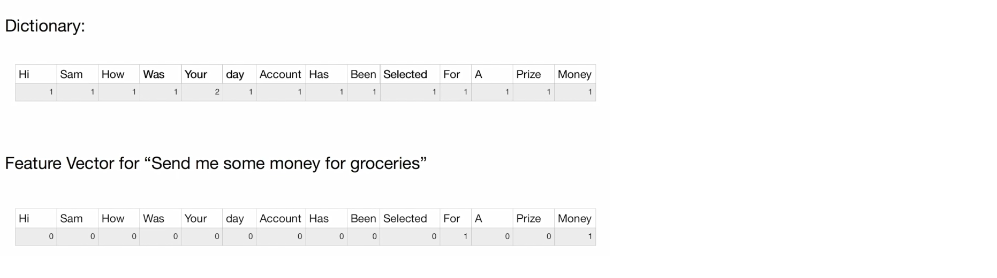

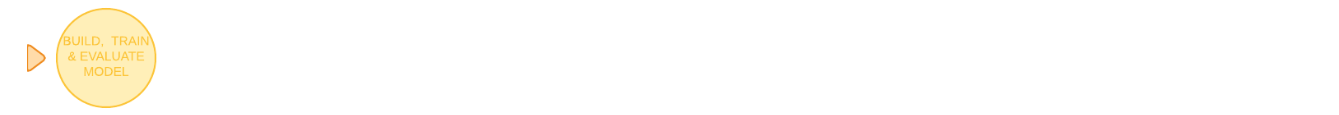

## Algorithm for Data Preparation and Model Building
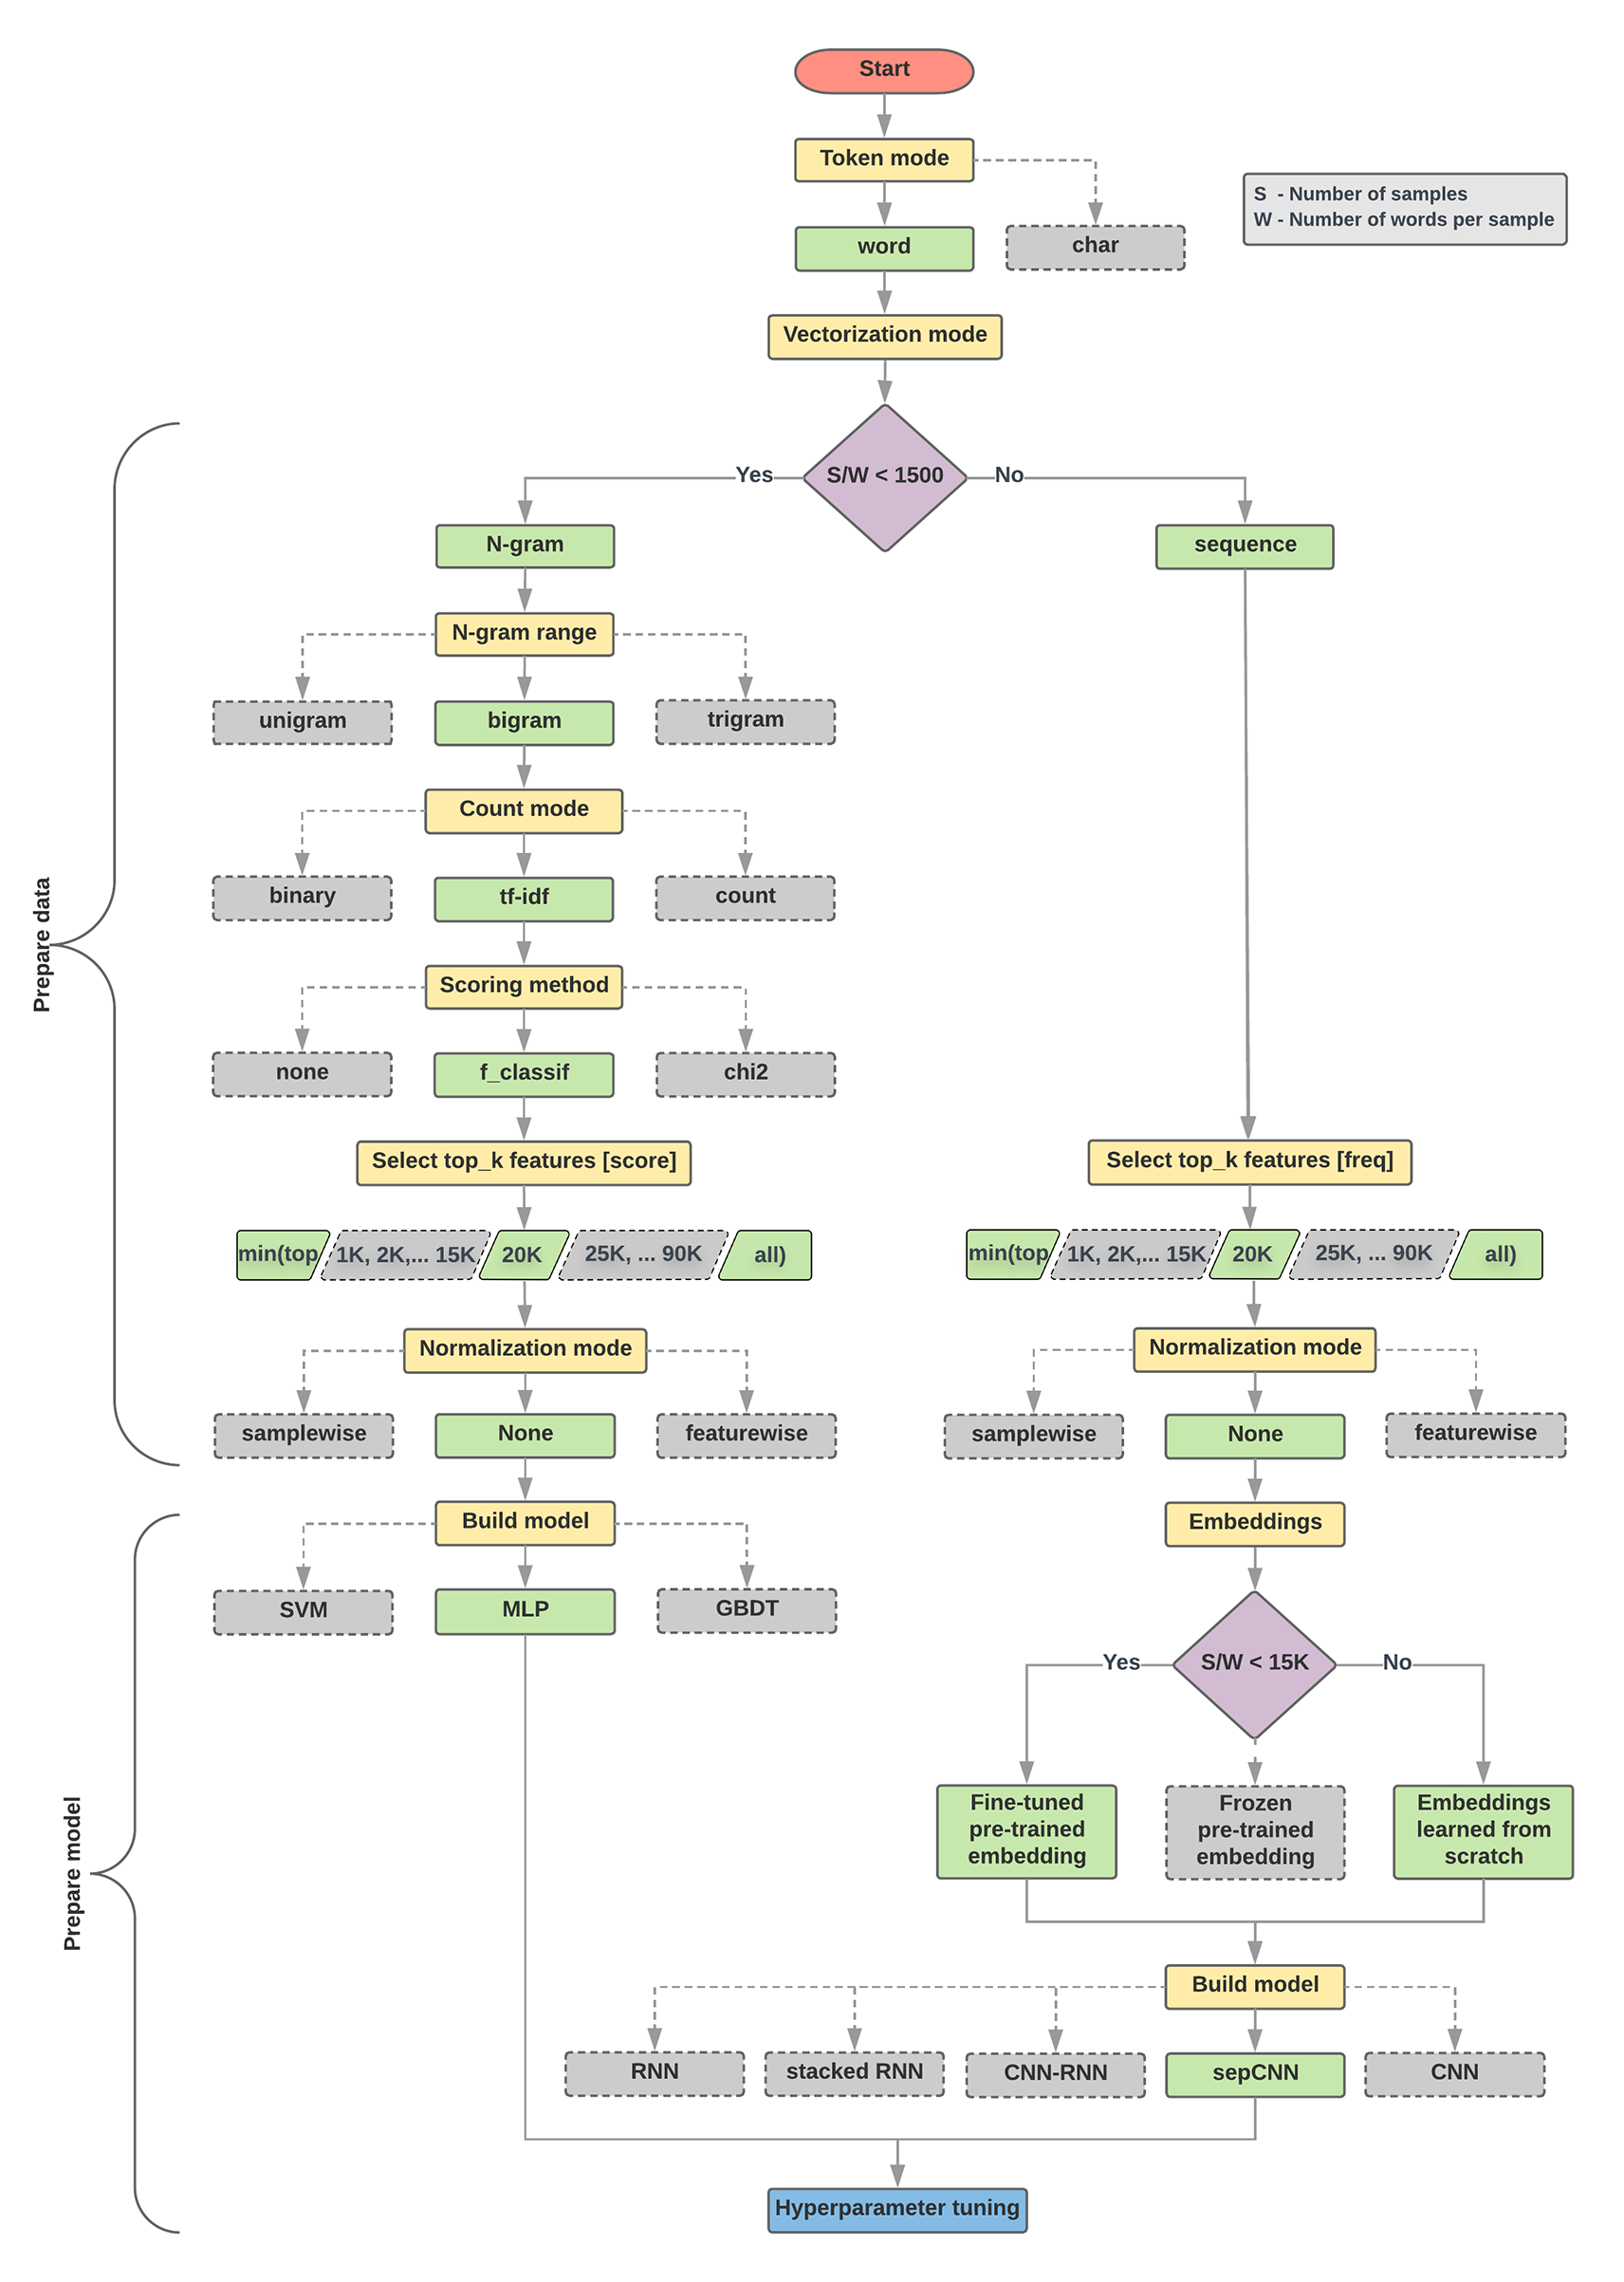